In [1]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split  # Import train_test_split here
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import os
from PIL import Image
import numpy as np

# Import file with data
data = pd.read_csv("small1.csv")

# read the images
folder_path = "bikeImages"
images = []
for filename in os.listdir(folder_path):    # Iterate through all files in the folder
    if filename.endswith(('.png')):
        file_path = os.path.join(folder_path, filename)
        img = Image.open(file_path)  # Open the image
        images.append(img)  # Add the image to the list
# Resize images 
resizedImages = [img.resize((224, 224)) for img in images]
img_rows, img_cols = 224, 224
# Convert the list of images to a NumPy array
imageArray = np.array([np.array(img) for img in resizedImages])
# input_shape = (img_rows, img_cols, 1)
trainImages, validationImages = train_test_split(imageArray, test_size=0.2, random_state=42)

# selectedFeatures = ['Shoe up angle', 'Down tube front diameter', 'Shoe sideways', 'Front  fender width', 'Fit scheme']
extractedData = data[['Fit scheme']]

trainData, validationData = train_test_split(extractedData, test_size=0.2, random_state=42)
# trainFeatures = trainData[['Shoe up angle', 'Down tube front diameter', 'Shoe sideways', 'Front  fender width']]
# validationFeatures = validationData[['Shoe up angle', 'Down tube front diameter', 'Shoe sideways', 'Front  fender width']]

# Encode the labels
label_encoder = LabelEncoder()
trainTarget = label_encoder.fit_transform(trainData['Fit scheme'])
trainLabels = tf.keras.utils.to_categorical(trainTarget, len(label_encoder.classes_))
validationTarget = label_encoder.transform(validationData['Fit scheme'])
validationlabels = tf.keras.utils.to_categorical(validationTarget, len(label_encoder.classes_))



In [13]:
from keras.applications import VGG16

# include top should be False to remove the softmax layer
pretrained_model = VGG16(include_top=True, weights='imagenet')
pretrained_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout

# Freeze the layers of the pretrained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Add a new head to the VGG16 backbone
x = pretrained_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)  # 4 classes for classification

# Create the new model
model = Model(inputs=pretrained_model.input, outputs=output)
model.compile(optimizer=tf.keras.optimizers.SGD(),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=['accuracy'])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       256,25

 Total params: 138,614,828 (528.77 MB)

 Trainable params: 257,284 (1005.02 KB)

 Non-trainable params: 138,357,544 (527.79 MB)

In [9]:
history = model.fit(trainImages, trainLabels, batch_size=16, epochs=3)

Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.5259 - loss: 1.3556
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 28s 5s/step - accuracy: 0.6575 - loss: 1.3196
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 30s 6s/step - accuracy: 0.7076 - loss: 1.2826


In [15]:

# Predict the labels
predictedProbabilities = model.predict(validationImages)
print(predictedProbabilities)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
[[0.26160023 0.2488332  0.25163522 0.23793134]
 [0.26167083 0.24896027 0.2511196  0.23824935]
 [0.26027292 0.24913613 0.25062457 0.2399664 ]
 [0.261498   0.24903212 0.25139832 0.23807149]
 [0.24955596 0.24864009 0.25513762 0.24666628]
 [0.26132283 0.24906059 0.25172988 0.23788673]
 [0.26157883 0.24882683 0.25163355 0.23796073]
 [0.24998681 0.25038877 0.25091776 0.24870673]
 [0.26155198 0.24875927 0.25147516 0.23821355]
 [0.25745803 0.24972485 0.25058544 0.24223173]
 [0.2563626  0.24791911 0.25253993 0.24317844]
 [0.2529456  0.24749374 0.2542968  0.24526381]
 [0.25419915 0.24756809 0.253712   0.24452077]
 [0.25929487 0.24918373 0.25077948 0.24074195]
 [0.2612064  0.24855246 0.2489348  0.24130629]
 [0.26126832 0.24900296 0.25167587 0.2380528 ]
 [0.26112026 0.2492798  0.25131807 0.23828189]
 [0.262255   0.24817659 0.25031617 0.23925225]
 [0.26175854 0.24864057 0.25089204 0.23870882]
 [0.26069793 0.24908288 0.2501606  0.2400586 ]]


In [16]:
predictedLabels = np.argmax(predictedProbabilities, axis=1)
print(predictedLabels)

[0 0 0 0 2 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0]


In [17]:
predictedLabels = np.argmax(predictedProbabilities, axis=1)
print(predictedLabels)
for p in predictedLabels:
    print(label_encoder.classes_[p])
        

[0 0 0 0 2 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0]
Cyclocross
Cyclocross
Cyclocross
Cyclocross
Road
Cyclocross
Cyclocross
Road
Cyclocross
Cyclocross
Cyclocross
Road
Cyclocross
Cyclocross
Cyclocross
Cyclocross
Cyclocross
Cyclocross
Cyclocross
Cyclocross


In [19]:
# validate 
performanceMetrics = model.evaluate(validationImages, validationlabels)
print(performanceMetrics)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.1500 - loss: 1.3849
[1.3849161863327026, 0.15000000596046448]


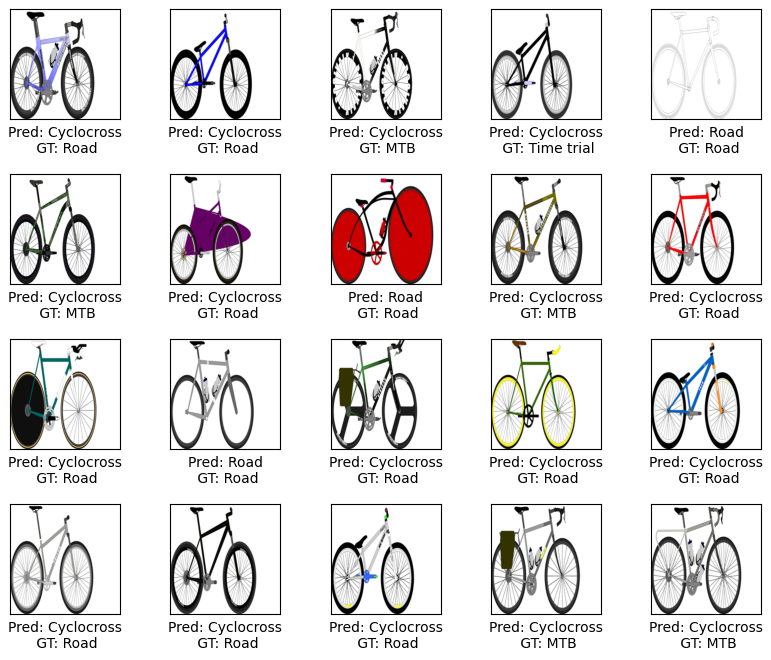

In [24]:
from matplotlib import pyplot as plt
n = len(validationImages)
classNames = label_encoder.classes_
plt.figure(figsize=(10,10))
for i in range(n):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(validationImages[i], cmap=plt.cm.binary)
    plt.subplots_adjust(hspace=0.5)
    caption = "Pred: " + str(classNames[predictedLabels[i]]) + "\n GT: " + str(label_encoder.classes_[validationTarget[i]])
    plt.xlabel(caption)
plt.show()